# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | bahia honda
Processing Record 4 of Set 1 | kinmparana
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | yemva
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | kuta
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | voru
Processing Record 12 of Set 1 | kokopo
Processing Record 13 of Set 1 | stephenville
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | nogliki
Processing Record 16 of Set 1 | waynesville
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | huai'an
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | mil'kovo
Processing Record 21 of Set 1 | kununurra
Processing Record 22 of Set 1 | broome
P

Processing Record 39 of Set 4 | new norfolk
Processing Record 40 of Set 4 | lerwick
Processing Record 41 of Set 4 | inari
Processing Record 42 of Set 4 | cafayate
Processing Record 43 of Set 4 | fort bragg
Processing Record 44 of Set 4 | mesyagutovo
Processing Record 45 of Set 4 | nanning
Processing Record 46 of Set 4 | callao
Processing Record 47 of Set 4 | borda da mata
Processing Record 48 of Set 4 | abepura
Processing Record 49 of Set 4 | manokwari
Processing Record 0 of Set 5 | ashland
Processing Record 1 of Set 5 | ometepec
Processing Record 2 of Set 5 | merowe
Processing Record 3 of Set 5 | tralee
Processing Record 4 of Set 5 | adel
Processing Record 5 of Set 5 | honiara
Processing Record 6 of Set 5 | beyneu
Processing Record 7 of Set 5 | mazagao
Processing Record 8 of Set 5 | whitehorse
Processing Record 9 of Set 5 | banyuls de la marenda
Processing Record 10 of Set 5 | yanchep
Processing Record 11 of Set 5 | arraial do cabo
Processing Record 12 of Set 5 | verkhnevilyuysk
Proce

Processing Record 28 of Set 8 | guiuan
Processing Record 29 of Set 8 | olinda
Processing Record 30 of Set 8 | tucumcari
Processing Record 31 of Set 8 | norilsk
Processing Record 32 of Set 8 | conde
Processing Record 33 of Set 8 | pervomayskoye
Processing Record 34 of Set 8 | kourou
Processing Record 35 of Set 8 | ouellah
City not found. Skipping...
Processing Record 36 of Set 8 | mahanoro
Processing Record 37 of Set 8 | sitangkai
Processing Record 38 of Set 8 | bagayevskaya
Processing Record 39 of Set 8 | sona
Processing Record 40 of Set 8 | oratorio
Processing Record 41 of Set 8 | minas de marcona
Processing Record 42 of Set 8 | karystos
Processing Record 43 of Set 8 | bagua grande
Processing Record 44 of Set 8 | sungai penuh
Processing Record 45 of Set 8 | happy valley-goose bay
Processing Record 46 of Set 8 | wiefelstede
Processing Record 47 of Set 8 | kilju
Processing Record 48 of Set 8 | lae
Processing Record 49 of Set 8 | koryazhma
Processing Record 0 of Set 9 | quellon
Processin

Processing Record 17 of Set 12 | santa maria del oro
Processing Record 18 of Set 12 | tornio
Processing Record 19 of Set 12 | tsiombe
Processing Record 20 of Set 12 | usinsk
Processing Record 21 of Set 12 | grand-bassam
Processing Record 22 of Set 12 | broken hill
Processing Record 23 of Set 12 | edeia
Processing Record 24 of Set 12 | kiomboi
Processing Record 25 of Set 12 | la sarre
Processing Record 26 of Set 12 | nadym
Processing Record 27 of Set 12 | alotau
Processing Record 28 of Set 12 | storozhevaya
Processing Record 29 of Set 12 | at taj
Processing Record 30 of Set 12 | murun-kuren
Processing Record 31 of Set 12 | upata
Processing Record 32 of Set 12 | alagoinhas
Processing Record 33 of Set 12 | siwa oasis
Processing Record 34 of Set 12 | mutuali
Processing Record 35 of Set 12 | onguday
Processing Record 36 of Set 12 | rio de janeiro
Processing Record 37 of Set 12 | faaa
Processing Record 38 of Set 12 | boyolangu
Processing Record 39 of Set 12 | curillo
Processing Record 40 of 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,2.86,91,49,6.71,CL,1726367935
1,port-aux-francais,-49.3500,70.2167,0.47,64,91,14.96,TF,1726367937
2,bahia honda,22.9036,-83.1592,27.43,83,44,1.72,CU,1726367938
3,kinmparana,12.8402,-4.9199,23.89,89,37,1.28,ML,1726367939
4,grytviken,-54.2811,-36.5092,-2.10,77,21,4.88,GS,1726367940


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



# Define the output directory
#output_dir = "output_data"

# Create the directory if it doesn't exist
#if not os.path.exists(output_dir):
    #os.makedirs(output_dir)

# Now export the City_Data into a CSV
#city_data_df.to_csv(os.path.join(output_dir, "cities.csv"), index_label="City_ID")






In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.86,91,49,6.71,CL,1726367935
1,port-aux-francais,-49.3500,70.2167,0.47,64,91,14.96,TF,1726367937
2,bahia honda,22.9036,-83.1592,27.43,83,44,1.72,CU,1726367938
3,kinmparana,12.8402,-4.9199,23.89,89,37,1.28,ML,1726367939
4,grytviken,-54.2811,-36.5092,-2.10,77,21,4.88,GS,1726367940


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

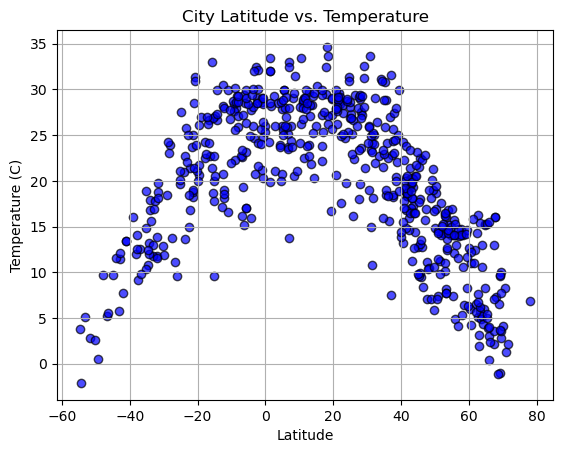

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c='blue', edgecolor='k', alpha=0.7, linewidth=1)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

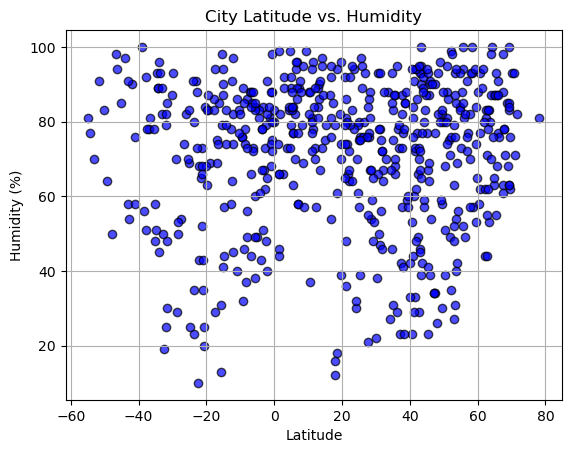

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c='blue', edgecolor='k', alpha=0.7, linewidth=1)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

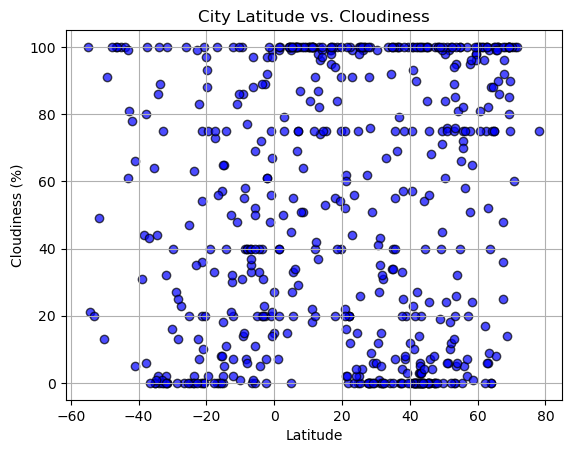

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c='blue', edgecolor='k', alpha=0.7, linewidth=1)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

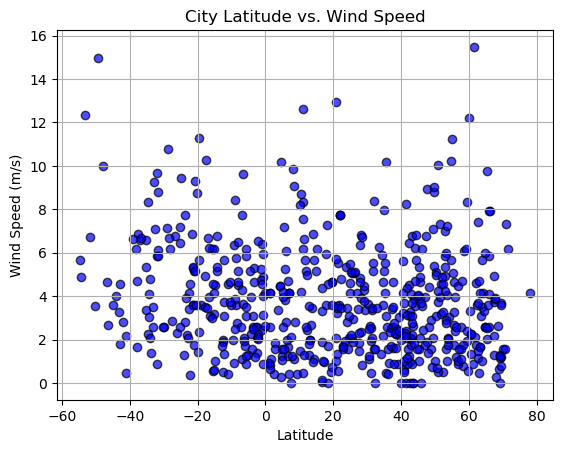

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c='blue', edgecolor='k', alpha=0.7, linewidth=1)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regression_plot(x_values, y_values, x_label, y_label, title, save_path):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, color='blue', edgecolor='k', alpha=0.7)
    plt.plot(x_values, regression_line, color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bahia honda,22.9036,-83.1592,27.43,83,44,1.72,CU,1726367938
3,kinmparana,12.8402,-4.9199,23.89,89,37,1.28,ML,1726367939
6,yemva,62.5900,50.8594,16.27,81,100,1.14,RU,1726367942
7,yellowknife,62.4560,-114.3525,14.29,83,75,3.60,CA,1726367943
10,voru,57.8339,27.0194,14.23,70,95,1.56,EE,1726367947


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.86,91,49,6.71,CL,1726367935
1,port-aux-francais,-49.3500,70.2167,0.47,64,91,14.96,TF,1726367937
4,grytviken,-54.2811,-36.5092,-2.10,77,21,4.88,GS,1726367940
5,blackmans bay,-43.0167,147.3167,11.40,58,61,1.79,AU,1726367941
8,kuta,-8.7233,115.1723,27.97,78,40,3.60,ID,1726367945


###  Temperature vs. Latitude Linear Regression Plot

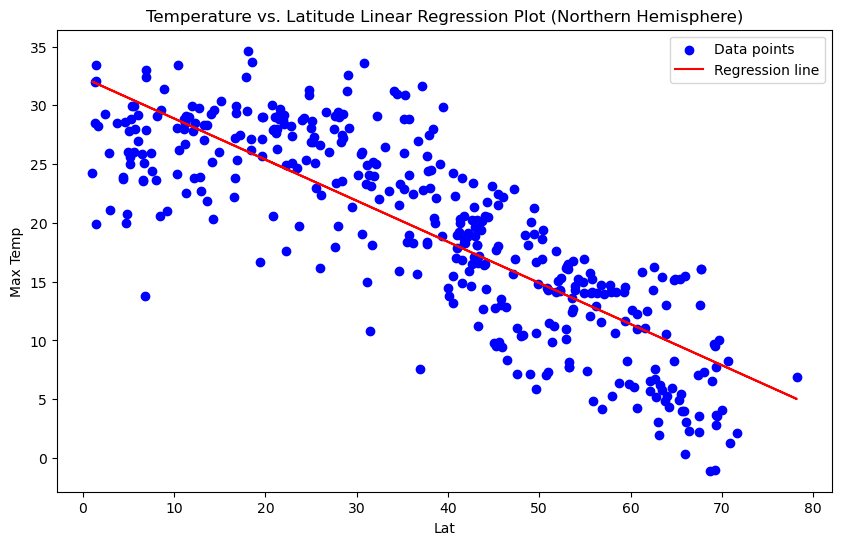

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], 
northern_hemi_df['Max Temp'])

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], color='blue', label='Data points')

regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Regression line')

plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression Plot (Northern Hemisphere)')


plt.legend()
plt.show()

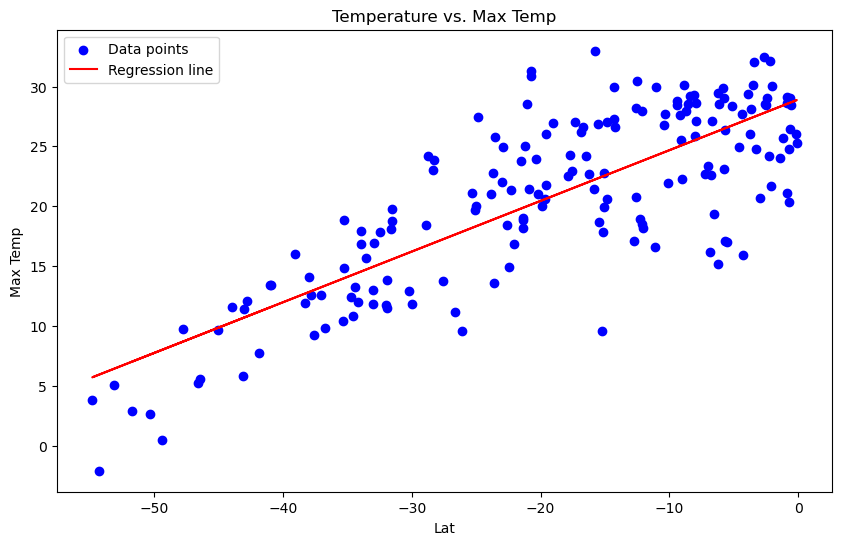

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], 
southern_hemi_df['Max Temp'])

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], color='blue', label='Data points')

regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Regression line')

plt.xlabel('Lat')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Max Temp')


plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

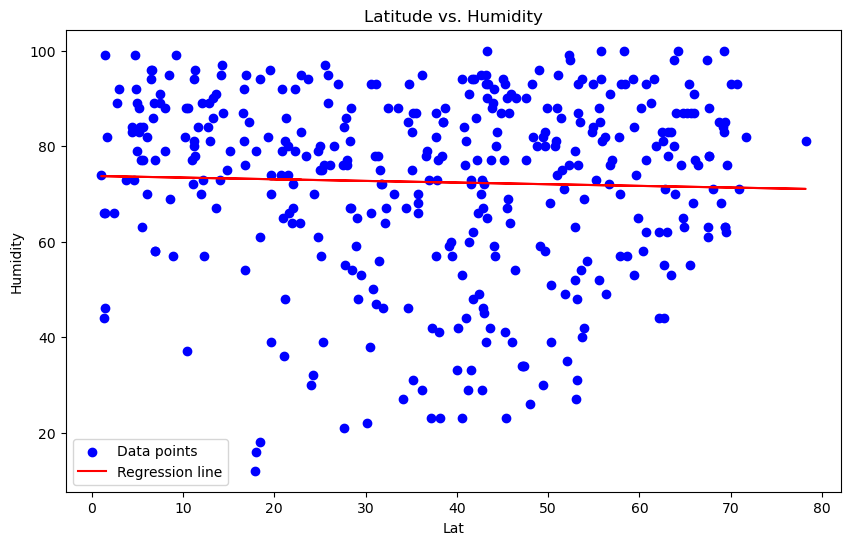

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], 
northern_hemi_df['Humidity'])

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], color='blue', label='Data points')

regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Regression line')

plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')


plt.legend()
plt.show()

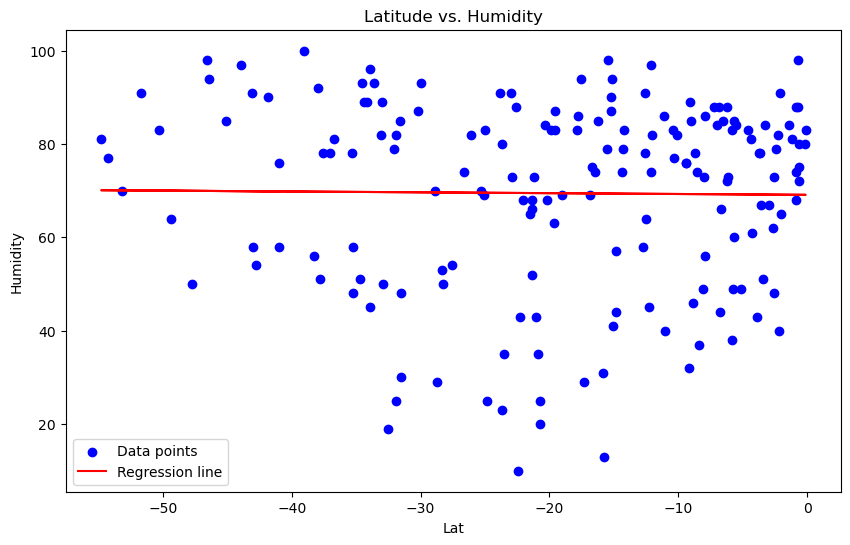

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], 
southern_hemi_df['Humidity'])

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], color='blue', label='Data points')

regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Regression line')

plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')


plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

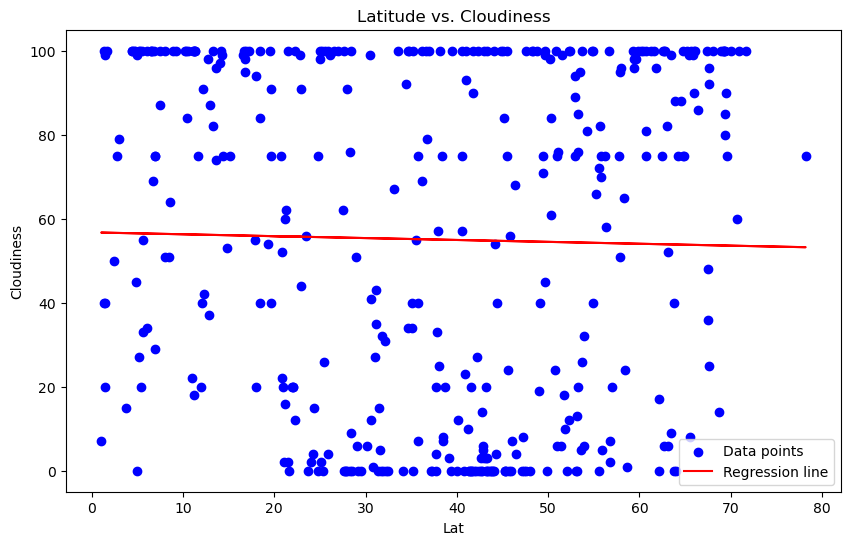

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], 
northern_hemi_df['Cloudiness'])

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], color='blue', label='Data points')

regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Regression line')

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')


plt.legend()
plt.show()

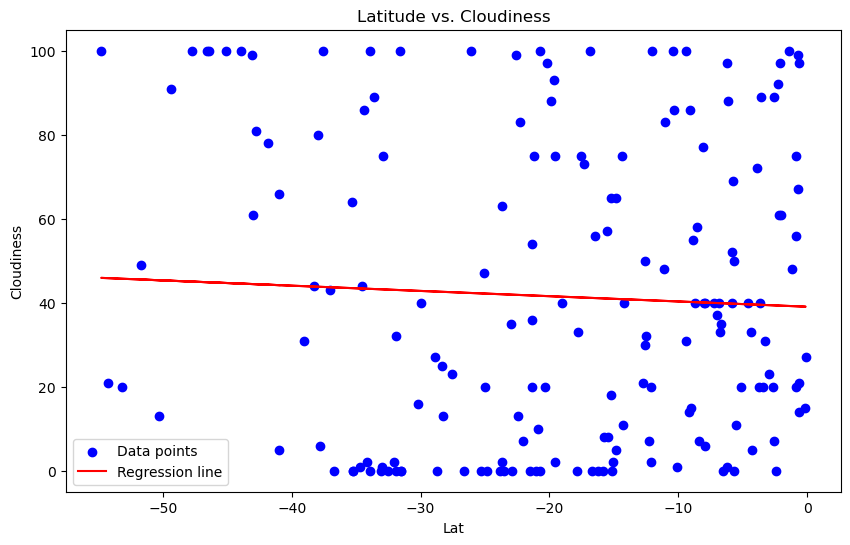

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], 
southern_hemi_df['Cloudiness'])

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], color='blue', label='Data points')

regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Regression line')

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')


plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

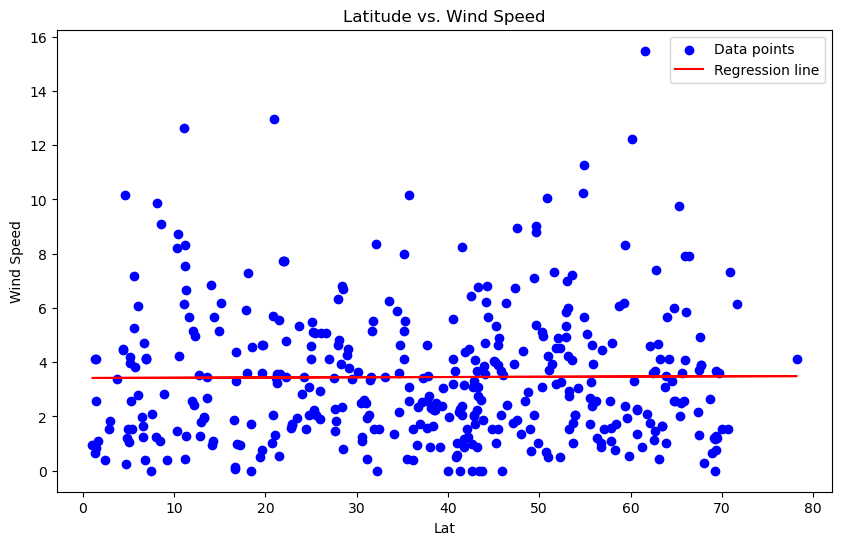

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], 
northern_hemi_df['Wind Speed'])

plt.figure(figsize=(10, 6))
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], color='blue', label='Data points')

regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color='red', label='Regression line')

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')


plt.legend()
plt.show()

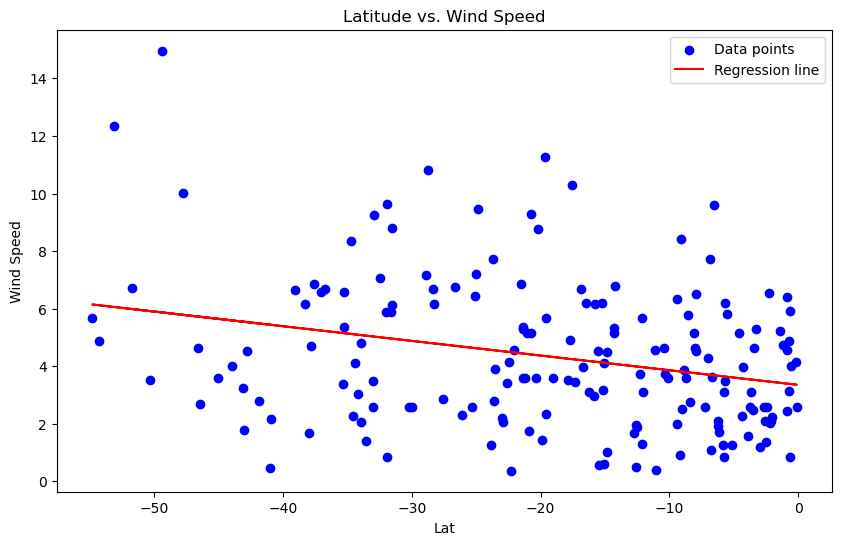

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], 
southern_hemi_df['Wind Speed'])

plt.figure(figsize=(10, 6))
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], color='blue', label='Data points')

regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color='red', label='Regression line')

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')


plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE